In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
url = 'https://drive.google.com/file/d/1mSkKEe0SUJ7AZHiubxKSke7HWf75JA_Z/view'

In [3]:
f_id=url.split('/')[-2]

In [4]:
f_url='https://drive.google.com/uc?id='+f_id

In [5]:
df = pd.read_csv(f_url)

In [6]:
df

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,YT,Total_Compensation
0,2015,4,Community Health,DPH,Public Health,250,"SEIU - Health Workers, Local 1021",Med Therapy & Auxiliary,Morgue Attendant,6725,12196,0,0.00,Calendar,16158
1,2013,4,Community Health,DPH,Public Health,39,"Stationary Engineers, Local 39",Journeyman Trade,Stationary Engineer,25058,74639,2820,12703.31,Fiscal,115784
2,2015,6,General Administration & Finance,ASR,Assessor/Recorder,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Appraisal & Taxation,Senior Real Property Appraiser,46108,100554,0,12424.50,Calendar,144708
3,2016,1,Public Protection,POL,Police,911,Police Officers' Association,Police Services,Sergeant 3,33369,140164,52754,13043.87,Fiscal,242323
4,2013,2,"Public Works, Transportation & Commerce",HHP,PUC Hetch Hetchy,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Engineer-Journey,28684,58813,0,7655.28,Calendar,82106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287831,2016,3,Human Welfare & Neighborhood Development,DSS,Human Services,535,"SEIU - Human Services, Local 1021",Human Services,Senior Eligibility Worker,9610,78980,30115,13068.80,Fiscal,147079
287832,2015,5,Culture & Recreation,LIB,Public Library,790,"SEIU - Miscellaneous, Local 1021",Library,Librarian 1,790,30704,0,5465.57,Calendar,40174
287833,2014,2,"Public Works, Transportation & Commerce",HHP,PUC Hetch Hetchy,6,"Electrical Workers, Local 6",Journeyman Trade,Electronic Maintenance Tech,38352,104451,0,13054.94,Calendar,164669
287834,2013,1,Public Protection,JUV,Juvenile Probation,250,"SEIU - Health Workers, Local 1021",Housekeeping & Laundry,Porter,29266,14425,0,4051.90,Calendar,19594


In [7]:
print('Their are, \n{} rows and \n{} columns with \n{} employee data'.format(df.shape[0],df.shape[1],df.EI.unique().size))

Their are, 
287836 rows and 
15 columns with 
52403 employee data


In [8]:
df.describe()

,Year,OGC,UC,EI,Salaries,Overtime,H/D,Total_Compensation
count,287836.000000,287836.000000,287836.000000,287836.000000,287836.000000,287836.000000,287836.000000,287836.000000
mean,2014.250104,2.976007,490.540186,26913.060020,63262.713139,4401.037115,8932.876472,97990.329882
std,1.016282,1.575586,333.238723,15539.719696,44638.657748,11079.137749,4894.072024,67750.020573
min,2013.000000,1.000000,1.000000,1.000000,-68771.000000,-12308.000000,-2940.470000,-74082.000000
25%,2013.000000,2.000000,236.000000,13434.000000,23406.000000,0.000000,4358.347500,35977.000000
50%,2014.000000,2.000000,535.000000,27013.000000,62504.500000,0.000000,11982.035000,98033.000000
75%,2015.000000,4.000000,790.000000,40397.250000,93000.250000,2738.000000,12801.790000,142138.250000
max,2016.000000,7.000000,990.000000,53794.000000,515101.000000,227313.000000,21872.800000,653498.000000


In [9]:
df.dtypes

Year                    int64
OGC                     int64
OG                     object
DC                     object
Dept                   object
UC                      int64
Union                  object
JF                     object
Job                    object
EI                      int64
Salaries                int64
Overtime                int64
H/D                   float64
YT                     object
Total_Compensation      int64
dtype: object

In [10]:
df['Year']=pd.to_datetime(df.Year, format='%Y')

In [11]:
df.dtypes

Year                  datetime64[ns]
OGC                            int64
OG                            object
DC                            object
Dept                          object
UC                             int64
Union                         object
JF                            object
Job                           object
EI                             int64
Salaries                       int64
Overtime                       int64
H/D                          float64
YT                            object
Total_Compensation             int64
dtype: object

In [12]:
df.set_index('EI',inplace=True)

In [13]:
df.isnull().sum()

Year                   0
OGC                    0
OG                     0
DC                     0
Dept                   0
UC                     0
Union                 36
JF                    38
Job                    0
Salaries               0
Overtime               0
H/D                    0
YT                     0
Total_Compensation     0
dtype: int64

In [14]:
df[df['Union'].isnull()].head()

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,Salaries,Overtime,H/D,YT,Total_Compensation
EI,,,,,,,,,,,,,,
13880,2016-01-01,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,790,NaN,NaN,Transportation Controller Trainee,28416,0,3940.59,Fiscal,42123
47943,2016-01-01,5,Culture & Recreation,REC,Recreation and Park Commission,790,NaN,NaN,Recreation Facility Assistant,8060,0,2849.45,Fiscal,13515
41454,2016-01-01,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,790,NaN,NaN,Transportation Controller Trainee,20502,468,2843.22,Fiscal,30612
7879,2016-01-01,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,790,NaN,NaN,Transportation Controller Trainee,14028,1486,1945.36,Fiscal,22849
32368,2016-01-01,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,790,NaN,NaN,Transportation Controller Trainee,28416,4703,3940.59,Fiscal,47277


In [15]:
df[df['UC']==790].head(1)

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,Salaries,Overtime,H/D,YT,Total_Compensation
EI,,,,,,,,,,,,,,
7385,2014-01-01,6,General Administration & Finance,TTX,Treasurer/Tax Collector,790,"SEIU - Miscellaneous, Local 1021",Revenue,Senior Collections Officer,71466,0,12512.55,Fiscal,105849


In [16]:
# So UC 790 is 'SEIU - Miscellaneous, Local 1021' 

In [17]:
# Checking how many column with Union missing are of same UC
len(df[(df['Union'].isnull()) & (df['UC']==790)])

36

In [18]:
# since every missing value in Union is of same type, imputing them with 'SEIU - Miscellaneous, Local 1021'

df['Union'].fillna('SEIU - Miscellaneous, Local 1021',inplace=True)

In [19]:
# Now for JF column
df[df['JF'].isnull()].head()

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,Salaries,Overtime,H/D,YT,Total_Compensation
EI,,,,,,,,,,,,,,
13880,2016-01-01,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,790,"SEIU - Miscellaneous, Local 1021",NaN,Transportation Controller Trainee,28416,0,3940.59,Fiscal,42123
47943,2016-01-01,5,Culture & Recreation,REC,Recreation and Park Commission,790,"SEIU - Miscellaneous, Local 1021",NaN,Recreation Facility Assistant,8060,0,2849.45,Fiscal,13515
41454,2016-01-01,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,790,"SEIU - Miscellaneous, Local 1021",NaN,Transportation Controller Trainee,20502,468,2843.22,Fiscal,30612
7879,2016-01-01,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,790,"SEIU - Miscellaneous, Local 1021",NaN,Transportation Controller Trainee,14028,1486,1945.36,Fiscal,22849
32368,2016-01-01,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,790,"SEIU - Miscellaneous, Local 1021",NaN,Transportation Controller Trainee,28416,4703,3940.59,Fiscal,47277


In [20]:
# Since JF is related to Job checking for values
df[df['JF'].isnull()]['Job'].unique()

array(['Transportation Controller Trainee',
       'Recreation Facility Assistant', 'Managing Director'], dtype=object)

In [21]:
# The above three Job are missing their JF
# Checking for their JF in the dataframe
df[(df['Job']=='Transportation Controller Trainee') & df['JF'].notnull()]

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,Salaries,Overtime,H/D,YT,Total_Compensation
EI,,,,,,,,,,,,,,


In [22]:
df[(df['Job']=='Recreation Facility Assistant') & df['JF'].notnull()]

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,Salaries,Overtime,H/D,YT,Total_Compensation
EI,,,,,,,,,,,,,,


In [23]:
df[(df['Job']=='Managing Director') & df['JF'].notnull()]

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,Salaries,Overtime,H/D,YT,Total_Compensation
EI,,,,,,,,,,,,,,


In [24]:
# Every missing job doesnt have JF in existing dataframe
# Checking the relative JF from the dataframe and imputing the missing values with it

df.JF.unique()

array(['Med Therapy & Auxiliary', 'Journeyman Trade',
       'Appraisal & Taxation', 'Police Services', 'Information Systems',
       'Revenue', 'Community Development', 'Recreation',
       'Public Service Aide', 'Nursing', 'Fire Services',
       'Professional Engineering', 'Protection & Apprehension',
       'Housekeeping & Laundry', 'Street Transit', 'Dietary & Food',
       'Library', 'Agriculture & Horticulture', 'SF Superior Court',
       'Correction & Detention', 'Clerical, Secretarial & Steno',
       'Human Services', 'Skilled Labor', 'Lab, Pharmacy & Med Techs',
       'Budget, Admn & Stats Analysis', 'Personnel', 'Management',
       'Payroll, Billing & Accounting', 'Health & Sanitation Inspection',
       'Computer Operatns & Repro Svcs', 'Public Health', 'Legal & Court',
       'Public Safety Inspection', 'Probation & Parole',
       'Supervisory-Labor & Trade', 'Hospital Administration',
       'Medical & Dental', 'Pub Relations & Spec Assts',
       'Purchasing & Store

In [25]:
# The 'Transportation Controller Trainee' matches to "Street Transit"
#     'Recreation Facility Assistant' to "Recreation"
#     'Managing Director' to "Administrative & Mgmt (Unrep)"
# Imputing as above
df[(df['JF'].isnull()) & (df['Job']=='Transportation Controller Trainee')] = df[(df['JF'].isnull()) & (df['Job']=='Transportation Controller Trainee')].fillna('Street Transit')
df[(df['JF'].isnull()) & (df['Job']=='Recreation Facility Assistant')] = df[(df['JF'].isnull()) & (df['Job']=='Recreation Facility Assistant')].fillna('Recreation')
df[(df['JF'].isnull()) & (df['Job']=='Managing Director')] = df[(df['JF'].isnull()) & (df['Job']=='Managing Director')].fillna('Administrative & Mgmt (Unrep)')

In [26]:
df.isnull().sum()

Year                  0
OGC                   0
OG                    0
DC                    0
Dept                  0
UC                    0
Union                 0
JF                    0
Job                   0
Salaries              0
Overtime              0
H/D                   0
YT                    0
Total_Compensation    0
dtype: int64

D:\Users\ADMIN pc3\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='OGC'>

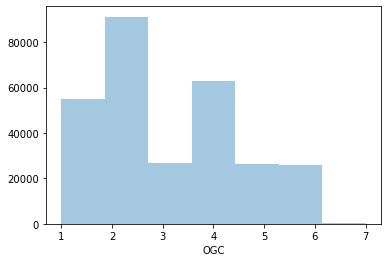

In [27]:
sns.distplot(df['OGC'],bins=7,kde=False)

In [28]:
df[df['OGC']==2].head(1)

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,Salaries,Overtime,H/D,YT,Total_Compensation
EI,,,,,,,,,,,,,,
28684,2013-01-01,2,"Public Works, Transportation & Commerce",HHP,PUC Hetch Hetchy,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Engineer-Journey,58813,0,7655.28,Calendar,82106


In [29]:
# There frequency of people from Public Works, Transportation & Commerce is highest

In [30]:
# The average spending of company throughout, groupedby year
df.groupby('Year').mean()[['Salaries','Total_Compensation']]

,Salaries,Total_Compensation
Year,,
2013-01-01,63894.330147,98141.315925
2014-01-01,62127.532228,97093.941524
2015-01-01,63019.503594,97971.129197
2016-01-01,64966.286659,99739.011877


In [31]:
df.dtypes

Year                  datetime64[ns]
OGC                            int64
OG                            object
DC                            object
Dept                          object
UC                             int64
Union                         object
JF                            object
Job                           object
Salaries                       int64
Overtime                       int64
H/D                          float64
YT                            object
Total_Compensation             int64
dtype: object

In [32]:
# the OGC column represents OG column, similarly
#     DC column represents Dept column,
#     UC column represents Union column,
# similarly Job column is subclass of JF 
# Dropping OG,Dept,Union,Job columns from dataset after making a copy.
df_copy=df.copy()

df.drop(['OG','Dept','Union','Job'],axis=1,inplace=True)

In [33]:
df

,Year,OGC,DC,UC,JF,Salaries,Overtime,H/D,YT,Total_Compensation
EI,,,,,,,,,,
6725,2015-01-01,4,DPH,250,Med Therapy & Auxiliary,12196,0,0.00,Calendar,16158
25058,2013-01-01,4,DPH,39,Journeyman Trade,74639,2820,12703.31,Fiscal,115784
46108,2015-01-01,6,ASR,21,Appraisal & Taxation,100554,0,12424.50,Calendar,144708
33369,2016-01-01,1,POL,911,Police Services,140164,52754,13043.87,Fiscal,242323
28684,2013-01-01,2,HHP,21,Information Systems,58813,0,7655.28,Calendar,82106
...,...,...,...,...,...,...,...,...,...,...
9610,2016-01-01,3,DSS,535,Human Services,78980,30115,13068.80,Fiscal,147079
790,2015-01-01,5,LIB,790,Library,30704,0,5465.57,Calendar,40174
38352,2014-01-01,2,HHP,6,Journeyman Trade,104451,0,13054.94,Calendar,164669


In [34]:
# the OGC and UC columns are of type int but should be object as they are codes representing category
df['OGC'] = df['OGC'].astype(object)
df['UC'] = df['UC'].astype(object)

D:\Users\ADMIN pc3\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salaries'>

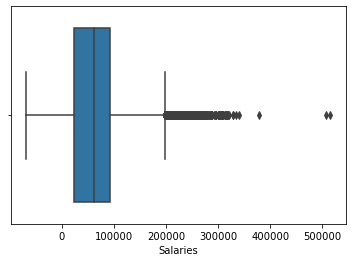

In [35]:
sns.boxplot(df['Salaries'])

In [36]:
df[df['Salaries']>200000].shape[0]

1344

In [37]:
# There are 1344 outliers in Salaries column removing them
df=df[df['Salaries']<200000]

In [38]:
# As EI as index may lead to errors in future resetting index
df.reset_index(inplace=True)

In [39]:
df.drop(['EI'],axis=1,inplace=True)

D:\Users\ADMIN pc3\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [40]:
# with z-score
z=np.abs(stats.zscore(df['Salaries']))

In [41]:
# Removing datapoints with zscore > 3 
df = df[(z < 3)].reset_index(drop=True)

In [42]:
z=np.abs(stats.zscore(df['Overtime']))

In [43]:
df.shape[0]*0.003  # The number of datapoints which are more than 3 Standard deviations away from mean

857.742

In [44]:
z[z>7].size  # The threshold of 7 has 639 points

639

In [45]:
df = df[(z < 7)].reset_index(drop=True)

In [47]:
df.groupby('Year').mean()

,Salaries,Overtime,H/D,Total_Compensation
Year,,,,
2013-01-01,62861.485042,4052.524162,9080.927519,96592.049060
2014-01-01,61247.683628,4192.013580,8888.680787,95754.226707
2015-01-01,61695.657788,4232.925544,8596.377238,96000.946781
2016-01-01,63336.941959,4546.297005,9133.810823,97260.839161


In [48]:
# There is not much significant effect of year on Salaries or Total_Compensation hence dropping it
df.drop(['Year'],axis=1,inplace=True)

In [49]:
df.describe()

,Salaries,Overtime,H/D,Total_Compensation
count,285275.000000,285275.000000,285275.000000,285275.000000
mean,62115.720393,4209.307104,8895.966870,96264.244767
std,42912.033591,10113.698301,4898.673574,65447.083385
min,-18437.000000,-12308.000000,-2940.470000,-24362.000000
25%,23016.000000,0.000000,4300.770000,35302.500000
50%,62162.000000,0.000000,11925.270490,97320.000000
75%,91895.500000,2725.000000,12801.790000,140642.000000
max,192523.000000,82044.000000,21872.800000,510574.000000


In [50]:
df=df[df['Salaries']>0]

In [51]:
df.describe()

,Salaries,Overtime,H/D,Total_Compensation
count,281850.000000,281850.000000,281850.000000,281850.000000
mean,62871.040401,4259.562242,9004.013252,97335.846688
std,42618.039271,10164.071190,4828.678533,65072.525342
min,1.000000,-12308.000000,-272.780000,-8965.000000
25%,24566.000000,0.000000,4587.380000,37792.250000
50%,62700.000000,0.000000,12019.685000,98259.000000
75%,92338.500000,2831.000000,12801.790000,141297.750000
max,192523.000000,82044.000000,21872.800000,510574.000000


In [52]:
df[df['Overtime']<0]

,OGC,DC,UC,JF,Salaries,Overtime,H/D,YT,Total_Compensation
9288,2,HHP,21,Management,3427,-1072,287.070000,Calendar,3653
32857,3,DSS,1,Public Service Aide,23093,-11,10213.130000,Fiscal,38110
37860,4,DPH,250,Nursing,57027,-213,13018.930000,Fiscal,88460
68544,2,CWP,21,Administrative-DPW/PUC,131540,-487,12512.550000,Fiscal,180437
81019,1,DAT,790,Legal & Court,38851,-263,6690.110000,Calendar,56475
107966,2,MTA,21,Professional Engineering,7305,-309,1167.420000,Fiscal,10367
112185,6,ADM,790,Public Service Aide,3173,-60,1021.730000,Fiscal,4375
113771,4,DPH,791,Nursing,101125,-12308,7394.570000,Fiscal,115924
120304,3,DSS,535,Human Services,12512,-23,2985.234032,Calendar,19729
145217,6,ADM,790,"Clerical, Secretarial & Steno",65201,-121,12512.550000,Fiscal,96770


In [53]:
# Negative Overtime could mean deduction from the salary due to some reasons, so these are ignored except for the one with minimum Overtime of -12308 which acts as an outlier
df=df[df.Overtime != -12308].reset_index(drop=True)

In [54]:
df[df['Total_Compensation']<0]

,OGC,DC,UC,JF,Salaries,Overtime,H/D,YT,Total_Compensation
19508,4,DPH,791,Nursing,4658,0,0.000000,Calendar,-662
24176,4,DPH,791,Nursing,329,0,0.000000,Fiscal,-1357
40980,4,DPH,791,Nursing,12329,0,0.000000,Calendar,-8965
54406,4,DPH,791,Nursing,2050,0,0.000000,Fiscal,-2364
55425,5,REC,790,Recreation,732,0,0.000000,Fiscal,-749
58100,4,DPH,791,Nursing,16493,0,0.000000,Fiscal,-3320
88711,4,DPH,791,Nursing,7,0,3.897454,Calendar,-268
92175,4,DPH,791,Nursing,4945,0,0.000000,Fiscal,-1931
134930,5,REC,790,Recreation,399,0,0.000000,Calendar,-598
151644,4,DPH,791,Nursing,1703,0,0.000000,Calendar,-2815


In [55]:
# Total_Compensation can be due to various other reasons unrelated to Salaries or other features hence ignored

In [56]:
Num_Features=['Salaries','Overtime','H/D']

In [57]:
#seperating the target column
Y=df['Total_Compensation']
df.drop(['Total_Compensation'],axis=1,inplace=True)

In [58]:
# Modelling on just Numerical features
df_X = df[Num_Features]

In [59]:
scaler=StandardScaler()
x_scaled = scaler.fit_transform(df_X)

In [60]:
# Splitting the dataframe into training and testing
x_train,x_test,y_train,y_test=train_test_split(x_scaled,Y,test_size=0.25,random_state=7)

In [61]:
x_train.shape

(211386, 3)

In [62]:
x_test.shape

(70463, 3)

In [63]:
# Model
lin_model = LinearRegression()
lin_model.fit(x_train,y_train)

LinearRegression()

In [65]:
#prediction & Scoring on train data
y_train_pred = lin_model.predict(x_train)


rmse = np.sqrt(mean_squared_error(y_train,y_train_pred))
r2 = r2_score(y_train,y_train_pred)
print('Scores of Model on Training data \nRMSE Score : {}\nR2 Score : {}'.format(rmse,r2))

Scores of Model on Training data 
RMSE Score : 7197.213899928682
R2 Score : 0.9877357256418233


In [66]:
# prediction & scoring on test data
y_test_pred = lin_model.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test,y_test_pred))
r2 = r2_score(y_test,y_test_pred)
print('Scores of Model on Testing data \nRMSE Score : {}\nR2 Score : {}'.format(rmse,r2))

Scores of Model on Testing data 
RMSE Score : 7211.443875511699
R2 Score : 0.9878111027686998


In [67]:
y_test_pred

array([ 43869.20469281, 104256.672215  , 138798.26178987, ...,
        12798.16830559,  89189.53170428,  12423.88182244])